#**Stage 1 - Hakuna Matata (Kelompok 5)**

* Ahmad Faqih Ulumuddin
* Ana Azzahra
* Athiya Fathinati Anindya
* Esa Risa Rouli Sekar Andonowari
* Jerio Benediktus Rumagit
* Mutiara Citra Sari
* Nicken Shidqia Nurahman

**Dataset: [TravelInsurancePrediction.csv](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data?resource=download)**

**GitHub: [Hakuna Matata](https://github.com/Hakuna-Matata-Travel-Insurance/Final-Project.git)**


In [1]:
# Library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/Hakuna-Matata-Travel-Insurance/Final-Project/main/TravelInsurancePrediction.csv'
df = pd.read_csv(url)

## Statistik Deskriptif

In [8]:
# Cek tipe data dan nama kolom
print("A. Tipe data dan nama kolom:")
print(df.info())

A. Tipe data dan nama kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB
None


In [6]:
# Tampilkan 5 baris pertama data
df.head(6)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0


In [7]:
# Cek nilai yang hilang
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [9]:
# Cek summary statistics
print("\nC. Summary statistics:")
print(df.describe(include='all'))


C. Summary statistics:
         Unnamed: 0          Age               Employment Type GraduateOrNot  \
count   1987.000000  1987.000000                          1987          1987   
unique          NaN          NaN                             2             2   
top             NaN          NaN  Private Sector/Self Employed           Yes   
freq            NaN          NaN                          1417          1692   
mean     993.000000    29.650226                           NaN           NaN   
std      573.741812     2.913308                           NaN           NaN   
min        0.000000    25.000000                           NaN           NaN   
25%      496.500000    28.000000                           NaN           NaN   
50%      993.000000    29.000000                           NaN           NaN   
75%     1489.500000    32.000000                           NaN           NaN   
max     1986.000000    35.000000                           NaN           NaN   

        AnnualI

In [10]:
# Mengubah tipe data dari kolom 'ChronicDiseases' dari integer ke object
df['ChronicDiseases'] = df['ChronicDiseases'].replace({0: 'No', 1: 'Yes'})

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0


In [12]:
# Melihat frekuensi nilai tertinggi di setiap kolom kategori
freq_cat = df[cat].describe()

print(freq_cat)

                     Employment Type GraduateOrNot ChronicDiseases  \
count                           1987          1987            1987   
unique                             2             2               2   
top     Private Sector/Self Employed           Yes              No   
freq                            1417          1692            1435   

       FrequentFlyer EverTravelledAbroad  
count           1987                1987  
unique             2                   2  
top               No                  No  
freq            1570                1607  


In [13]:
# Cek duplikasi
df.duplicated().sum()

0

In [14]:
# Cek total unique value
dict = []
for i in df.columns:
    print(f'{i} = {df[i].nunique()}')

Unnamed: 0 = 1987
Age = 11
Employment Type = 2
GraduateOrNot = 2
AnnualIncome = 30
FamilyMembers = 8
ChronicDiseases = 2
FrequentFlyer = 2
EverTravelledAbroad = 2
TravelInsurance = 2


In [11]:
# Membagi data menjadi numerikal dan kategorikal
numerical = df.select_dtypes(exclude='object')
categorical = df.select_dtypes(include='object')
num = numerical.columns
cat = categorical.columns

In [20]:
df2 = df.copy()

# Drop kolom yang tidak diperlukan 'unnamed:0'
df2 = df2.drop('Unnamed: 0', axis=1)

#convert 0 ke 'No' dan 1 ke 'Yes'
df2['TravelInsurance'] = df2['TravelInsurance'].map({0:'No', 1:'Yes'})
df2['ChronicDiseases'] = df2['ChronicDiseases'].map({0:'No', 1:'Yes'})

df2.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,NaN,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,NaN,No,No,No


In [21]:
df2.describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [22]:
df2.describe(include=['object'])

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,0,1987,1987,1987
unique,2,2,0,2,2,2
top,Private Sector/Self Employed,Yes,NaN,No,No,No
freq,1417,1692,NaN,1570,1607,1277


Selisih mean dan mediannya kecil, sehingga kecil kemungkinan terjadinya anomali di antara masing-masing unique value

In [25]:
# Membagi data numerikal dan kategorikal
num = df2.select_dtypes(exclude='object')
cat = df2.select_dtypes(include='object')

# Kolom
numerical = num.columns
categorical = cat.columns

In [26]:
numerical

Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')

In [27]:
categorical

Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [28]:
df2[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


Semua kolom mempunyai sebaran data yang sama dan tidak ada perbedaan yang signifikan antara mean dan median, serta maxnya tidak terlalu timpang

In [29]:
df2[categorical].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,0,1987,1987,1987
unique,2,2,0,2,2,2
top,Private Sector/Self Employed,Yes,NaN,No,No,No
freq,1417,1692,NaN,1570,1607,1277


In [30]:
df2[numerical].mode()

,Age,AnnualIncome,FamilyMembers
0,28,800000,4


In [31]:
# Persentasi Target
count_target = df2['TravelInsurance'].value_counts(normalize=True).mul(100).round(2)

count_target

No     64.27
Yes    35.73
Name: TravelInsurance, dtype: float64

### **Descriptive Statistics Insight**

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?

* Kolom 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', dan 'TravelInsurance' adalah tipe data Boolean, jadi untuk keperluan EDA sebaiknya disamakan saja tipenya menjadi object atau integer agar mudah dikategorikan menjadi data numerikal dan kategorikal. Ini akan memudahkan pemahaman bahwa data numerikal adalah yang berisi angka (integer), dan data kategorikal berisi karakter/string (object).

* Kolom 'TravelInsurance' tidak diubah karena merupakan target dan nantinya dibutuhkan data numerikal saat modelling machine learning.


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Tidak ada kolom yang memiliki nilai kosong dalam dataset ini.



C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

* Rentang umur pelanggan adalah 25-35, termasuk golongan usia produktif yang muda.

* Pelanggan didominasi oleh karyawan swasta dan wiraswasta, lulusan universitas, tidak mengidap penyakit kronis, tidak sering bepergian dengan pesawat dan belum pernah traveling keluar negeri.

* Pelanggan dengan frekuensi terbanyak berusia 28 tahun, dengan Pendapatan Tahunan 800.000, dan memiliki 4 Anggota Keluarga

* Pelanggan yang membeli asuransi perjalanan hanya 35,73%

## Analisis Univariat

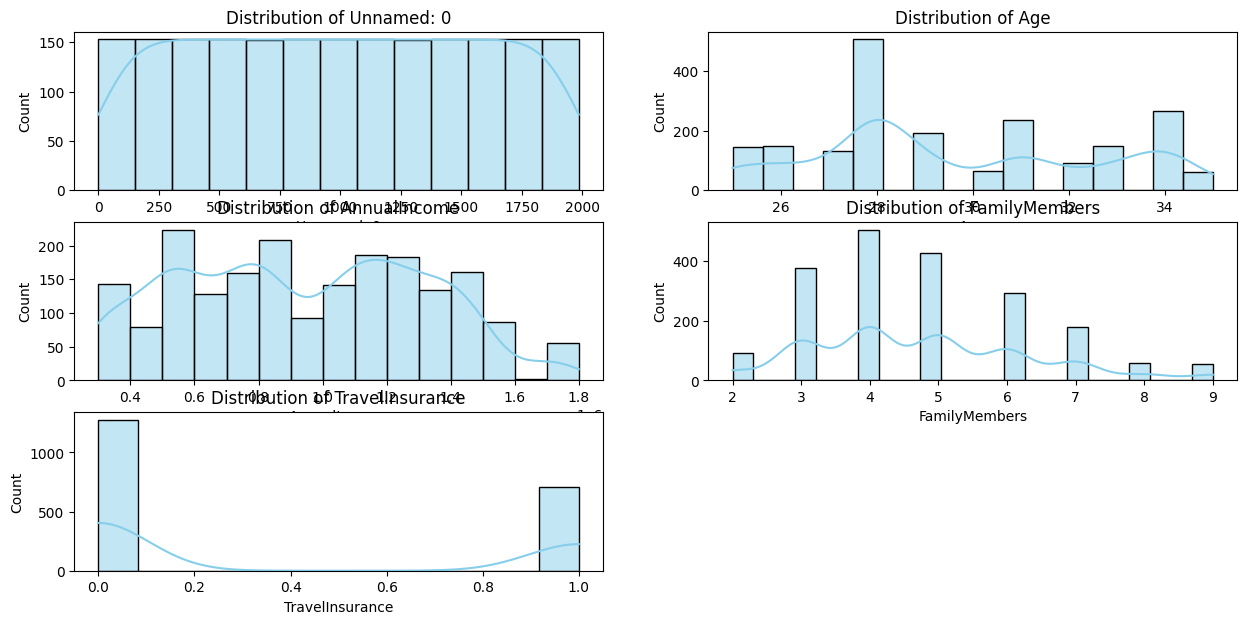

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Visualisasi distribusi masing-masing kolom numerik
numerical_columns = df.select_dtypes(include=['int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')

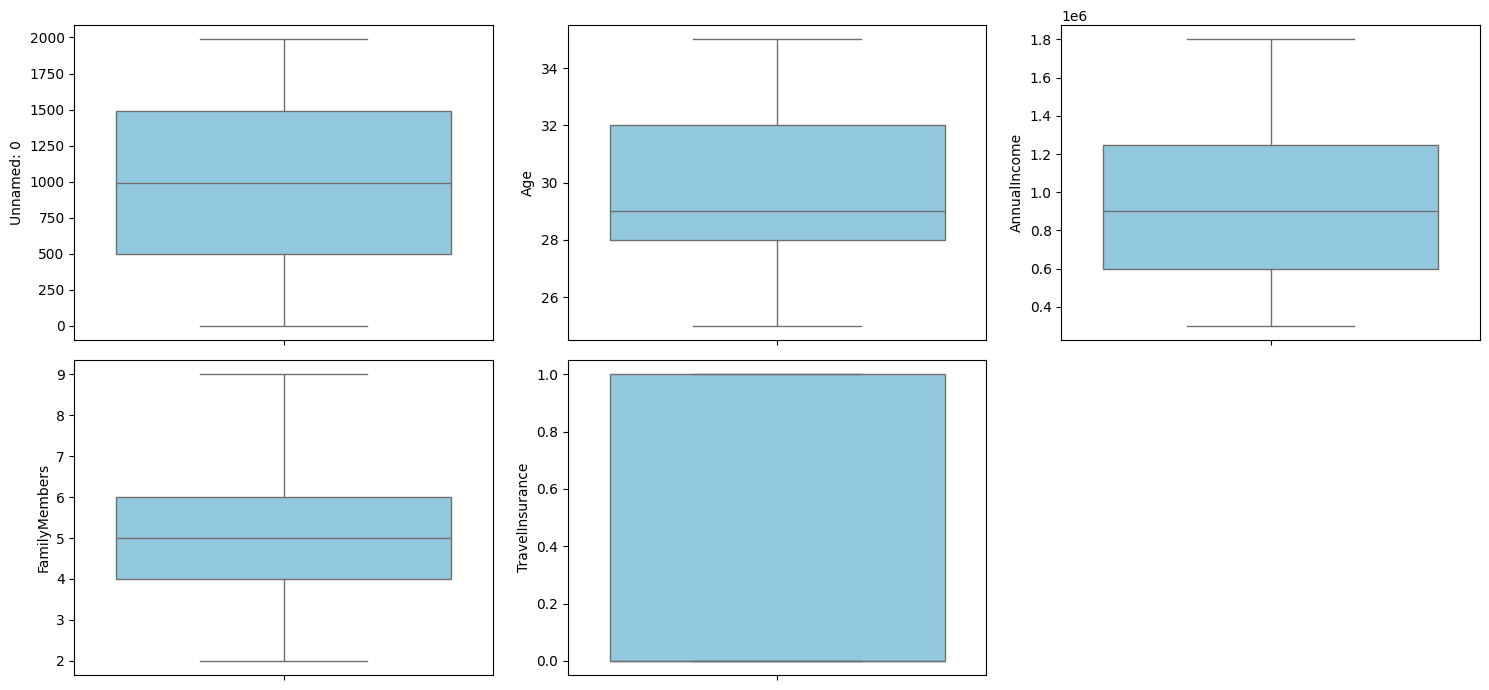

In [46]:
# Distribusi boxplot untuk fitur numerikal
plt.figure(figsize=(15,7))
numerical_columns = df.select_dtypes(include=['int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[column], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

<ipython-input-47-e965f035092d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(insurance_percentage, palette="hls")


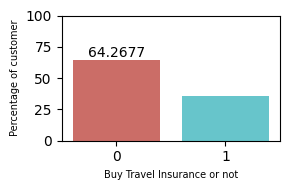

In [47]:
# Kalkulasi persentase dari TravelInsurance

insurance_percentage = df.groupby('TravelInsurance').size() / len(df) * 100

plt.figure(figsize=(3,2))
sns.barplot(insurance_percentage, palette="hls")
plt.ylabel('Percentage of customer', fontsize=7) # y axis label
plt.xlabel('Buy Travel Insurance or not', fontsize=7) # x axis label
plt.bar_label(plt.gca().containers[0])  # Add percentage labels on top of bars
plt.ylim(0, 100) # set y limit to 100
plt.tight_layout()

<ipython-input-52-217ae782d34f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="hls")
<ipython-input-52-217ae782d34f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="hls")
<ipython-input-52-217ae782d34f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="hls")
<ipython-input-52-217ae782d34f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

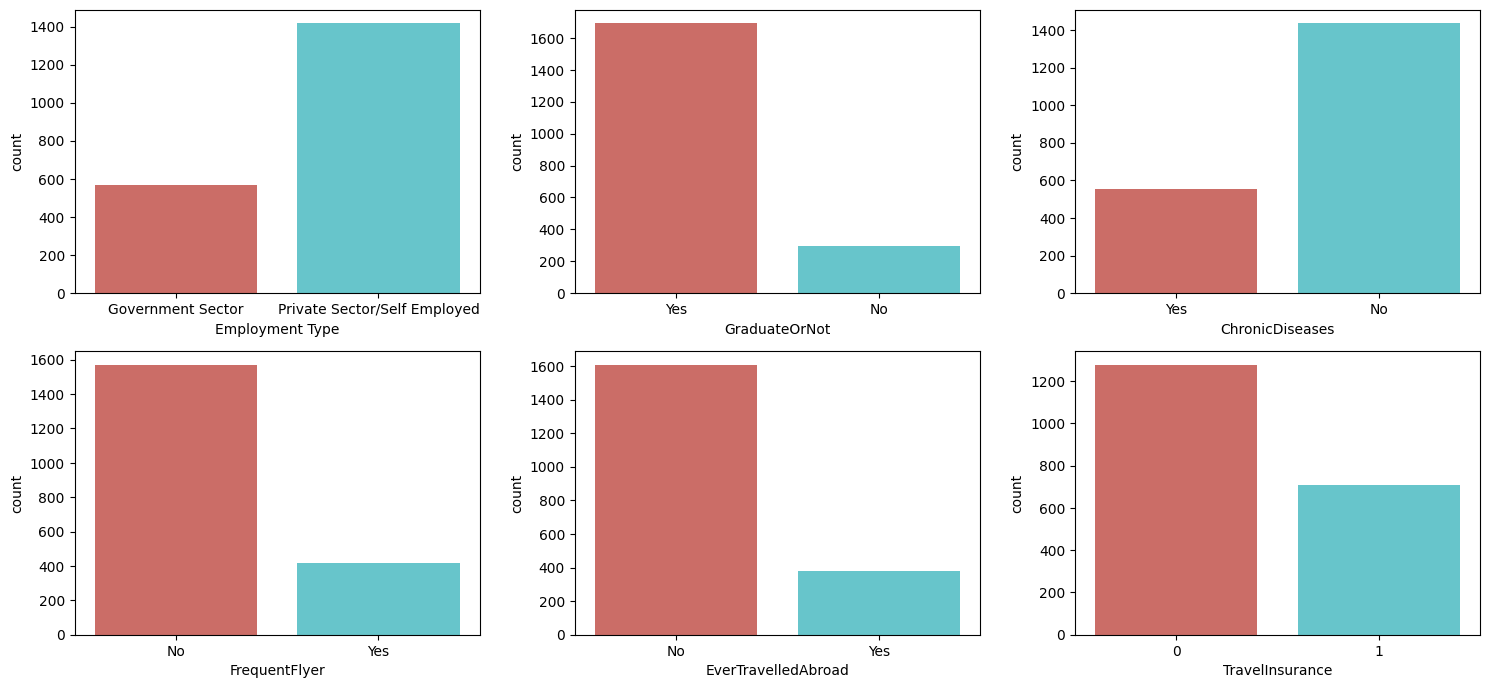

In [52]:
# Bar plot fitur kategorikal
plt.figure(figsize=(15,7))
for i, column in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette="hls")
plt.tight_layout()
plt.show()

<ipython-input-76-b9290f3912f8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="hls")
<ipython-input-76-b9290f3912f8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="hls")
<ipython-input-76-b9290f3912f8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="hls")
<ipython-input-76-b9290f3912f8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

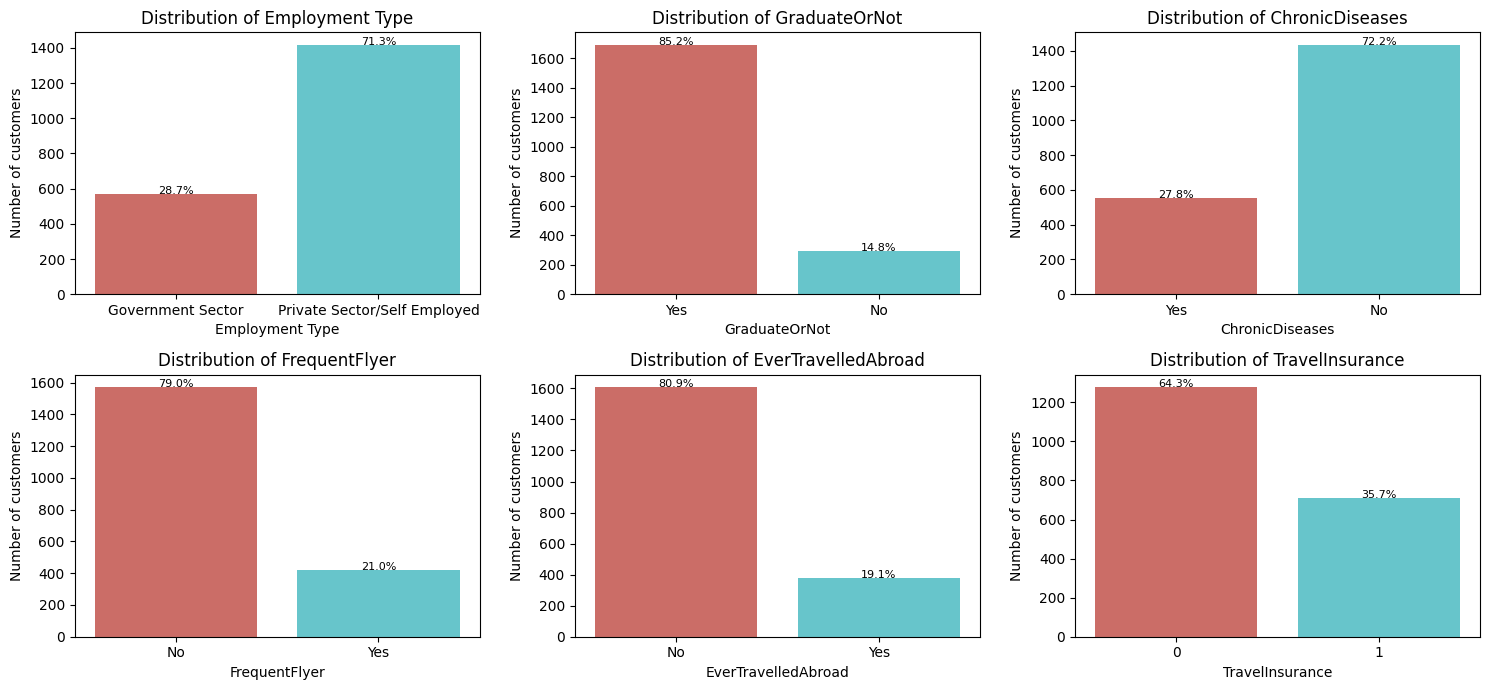

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'cat' is a list of categorical columns
cat = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

plt.figure(figsize=(15, 7))

for i, column in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette="hls")

    # Calculate and display percentages on top of each bar
    total = len(df[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.1%}', ha='center', fontsize=8)

    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()


### Analisis Univariat Insight

A. Fitur Numerikal
* Distribusi umur bervariasi, dengan mean, median, dan modus yang mirip (29.650226, 29, dan 28)
* Distribusi annual income bervariasi namun merata, dengan mean = 932,763 dan median = 900,000
* Distribusi anggota keluarga cenderung positif (positively skewed), dengan rata-rata (median) 5 orang. Anggota keluarga yang paling banyak muncul adalah 4 orang. Tiap pelanggan memiliki setidaknya 2 orang anggota keluarga
* Lebih dari 60% pelanggan tidak membeli travel insurance
* Tidak ada outlier

B. Fitur Kategorikal
* Lebih dari 70% pelanggan adalah karyawan swasta dan wiraswasta
* Sekitar 85% pelanggan adalah lulusan perguruan tinggi
* 27.8% pelanggan mengidap penyakit kronis
* Hanya 21% pelanggan yang sering bepergian dengan pesawat
* Hanya 19% pelanggan yang pernah traveling keluar negeri

## Analisis Multivariat

In [55]:
# Mengubah kolom boolean ke numerical
df2 = df.copy()

def convert_yesno_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

df2['GraduateOrNot'] = df2['GraduateOrNot'].apply(convert_yesno_to_binary)
df2['FrequentFlyer'] = df2['FrequentFlyer'].apply(convert_yesno_to_binary)
df2['EverTravelledAbroad'] = df2['EverTravelledAbroad'].apply(convert_yesno_to_binary)
df2['ChronicDiseases'] = df2['ChronicDiseases'].apply(convert_yesno_to_binary)

df2.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


<ipython-input-56-e1e2db4d3d61>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


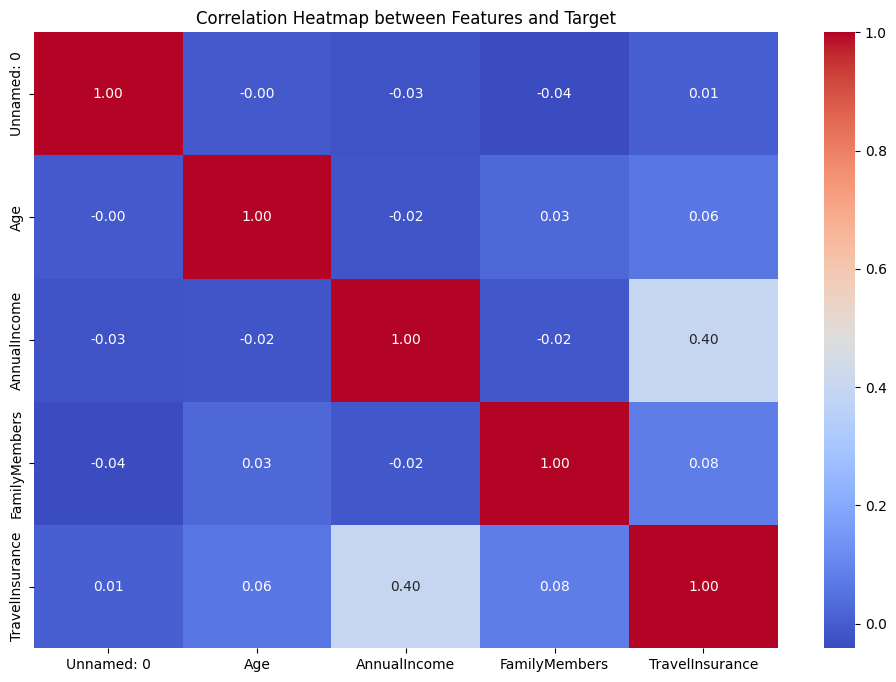

<Figure size 1500x1000 with 0 Axes>

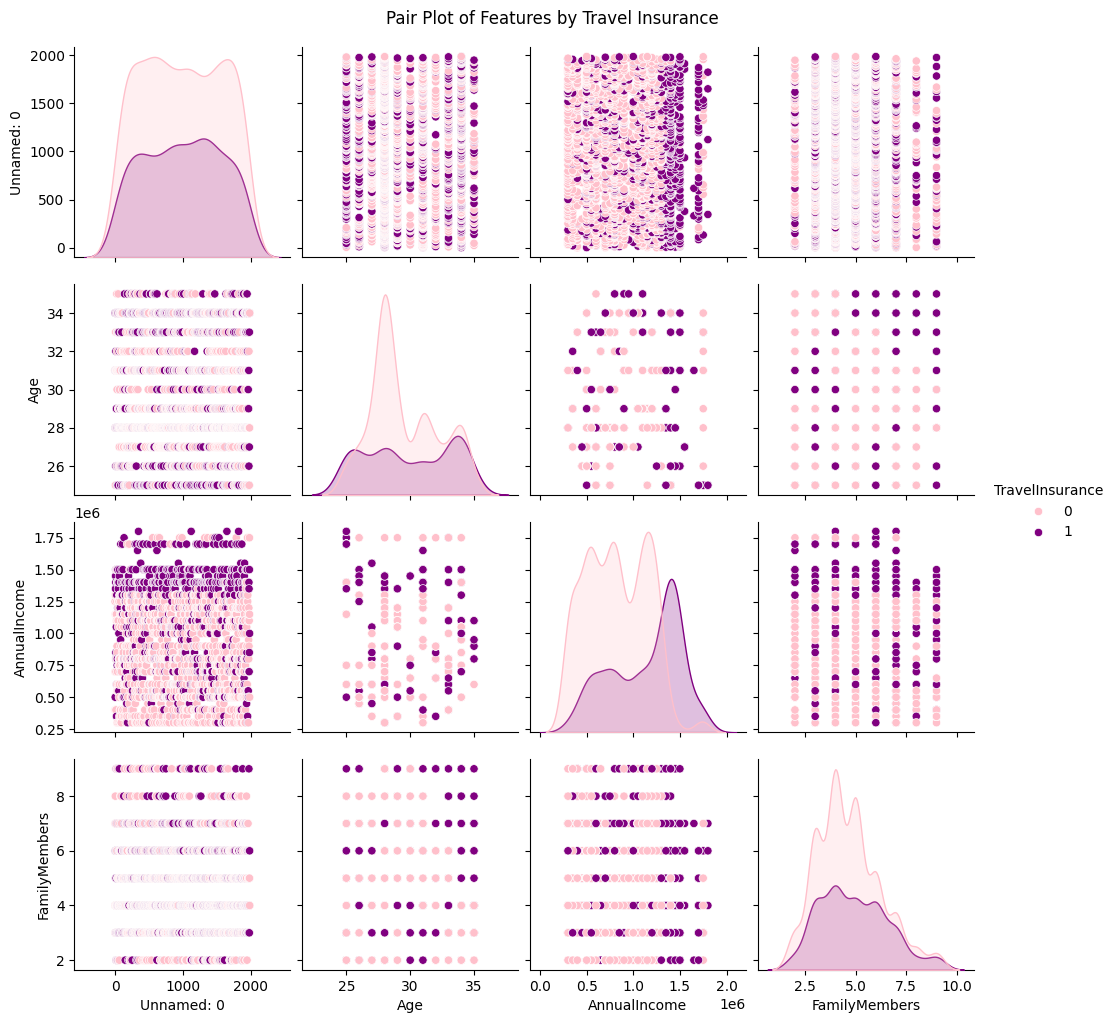

In [56]:
# A. Korelasi antara masing-masing feature dan label
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Target')
plt.show()

# B. Korelasi antar-feature
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='TravelInsurance', palette={0: 'pink', 1: 'purple'})
plt.suptitle('Pair Plot of Features by Travel Insurance', y=1.02)
plt.show()

<Axes: >

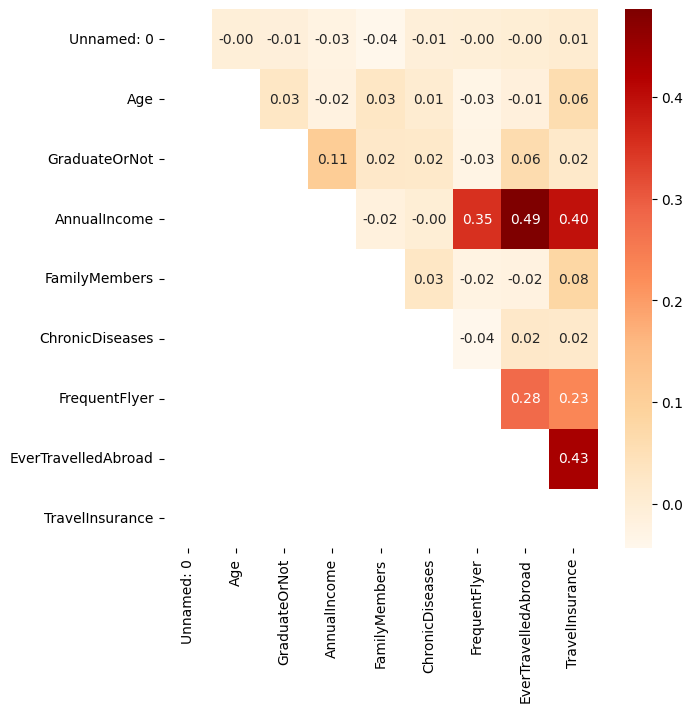

In [57]:
# Korelasi antar fitur numerikal
numericals2 = df2.select_dtypes(exclude='object')
num2 = numericals2.columns
corr = numericals2.corr()

mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

plt.figure(figsize=(7,7))
sns.heatmap(mask, cmap='OrRd', annot=True, fmt='.2f')

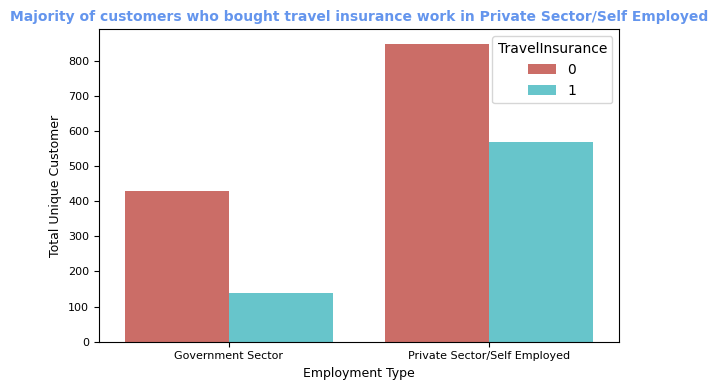

In [60]:
# Grafik antara Employment Type dengan target
plt.figure(figsize=(6,4))
sns.countplot(x='Employment Type', hue='TravelInsurance', data=df2, palette="hls")

plt.title('Majority of customers who bought travel insurance work in Private Sector/Self Employed',color='cornflowerblue',fontsize=10,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=9) # y axis label
plt.xlabel('Employment Type', fontsize=9) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 8);

plt.tight_layout()

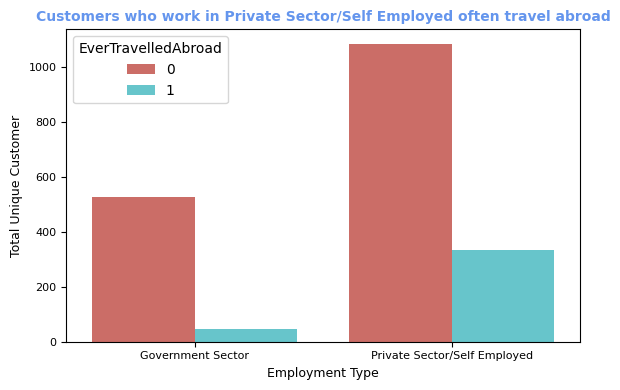

In [61]:
# Grafik antara Employment Type dengan EverTravelledAbroad
plt.figure(figsize=(6,4))
sns.countplot(x='Employment Type', hue='EverTravelledAbroad', data=df2, palette="hls")

plt.title('Customers who work in Private Sector/Self Employed often travel abroad',color='cornflowerblue',fontsize=10,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=9) # y axis label
plt.xlabel('Employment Type', fontsize=9) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 8);

plt.tight_layout()

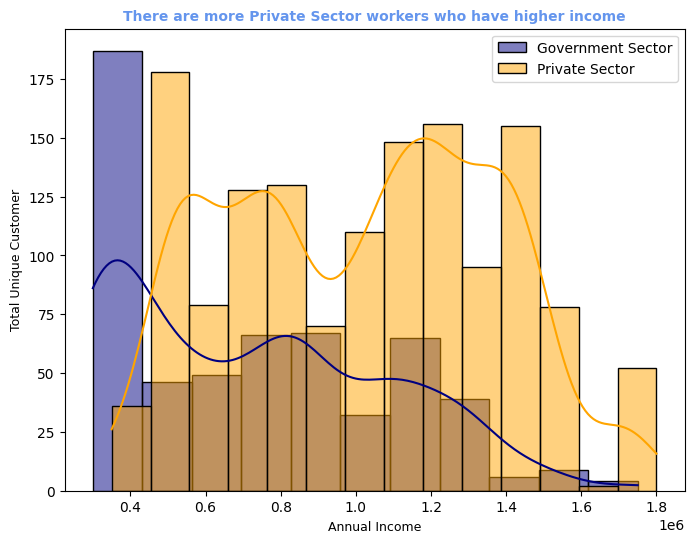

In [62]:
# Grafik antara Employment Type dengan Annual Income
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(df2[df2['Employment Type'] == 'Government Sector']['AnnualIncome'], color= 'navy', label= 'Government Sector', multiple="stack", kde=True)
sns.histplot(df2[df2['Employment Type'] == 'Private Sector/Self Employed']['AnnualIncome'], color= 'orange', label= 'Private Sector', multiple="stack", kde=True)

plt.title('There are more Private Sector workers who have higher income',color='cornflowerblue',fontsize=10,fontweight='bold')
plt.ylabel('Total Unique Customer', fontsize=9) # y axis label
plt.xlabel('Annual Income', fontsize=9) # x axis label
plt.legend()

In [63]:
# Rata-rata Annual Income tiap Employment Type
df_employment = df2.groupby('Employment Type')['AnnualIncome'].median().reset_index()
df_employment.rename(columns = {'AnnualIncome' : 'Average Annual Income'}, inplace=True)
df_employment

,Employment Type,Average Annual Income
0,Government Sector,700000.0
1,Private Sector/Self Employed,1050000.0


### Analisis Multivariat Insight

A. Korelasi antara Feature Numerik dan Target ('TravelInsurance'):

* Target memiliki korelasi positif paling tinggi dengan EverTravelledAbroad (0.43). Pelanggan yang pernah keluar negeri akan cenderung membeli travel insurance.
* Korelasi antara target dengan Annual Income cukup tinggi (0.4). Semakin tinggi pendapatan pelanggan, semakin besar kemungkinan pelanggan membeli travel insurance.
* Potensi pelanggan yang FrequentFlyer untuk untuk membeli Travel Insurance cukup potensial (0,23). Semakin sering berpergian pelanggan akan lebih memiliki kesadaran pentingnya memiliki sebuah Travel Insurance.

B. Korelasi antar Feature:

* Korelasi antara Annual Income dengan EverTravelledAbroad cukup tinggi (0.49), menunjukkan bahwa pelanggan dengan pendapatan yang tinggi pernah bepergian keluar negeri.
* Korelasi antara Annual Income dengan FrequentFlyer cukup tinggi (0.35), menunjukkan bahwa pelanggan dengan pendapatan yang tinggi sering bepergian dengan pesawat.

C. Korelasi antara Feature Kategorik dan Target ('TravelInsurance'):
Pelanggan yang bekerja di bidang swasta dan wiraswasta cenderung membeli travel insurance.

D. Korelasi antara Feature Kategorik dan Feature lainnya:
* Pelanggan yang pernah keluar negeri didominasi oleh karyawan swasta dan wiraswasta.
* Pelanggan yang bekerja di pemerintah kebanyakan memiliki pendapatan di bawah 400,000, semakin tinggi pendapatan semakin sedikit jumlah orangnya. Dapat dilihat juga rata-rata pendapatannya di bawah karyawan yang bekerja di sektor swasta. Sedangkan Pelanggan yang bekerja di sektor swasta memiliki rata-rata pendapatan lebih tinggi, dengan jumlah karyawan yang memiliki pendapatan di atas 450,000 lebih banyak.

## Business Insight

* Fokuskan strategi marketing pada pelanggan yang pernah bepergian ke luar negeri.
* Lakukan segmentasi pelanggan berdasarkan kategori pendapatan tahunan. Misalnya, tentukan rentang pendapatan rendah, menengah, dan tinggi. Sesuaikan penawaran dan premi travel insurance sesuai dengan segmentasi ini. Pelanggan dengan pendapatan lebih tinggi mungkin lebih bersedia untuk membayar premi yang lebih tinggi untuk manfaat tambahan. Berikan diskon atau insentif khusus kepada pelanggan dengan pendapatan tinggi.
* Tawarkan paket asuransi perjalanan premium dengan manfaat tambahan kepada pelanggan dengan pendapatan tinggi yang memiliki riwayat perjalanan internasional ('EverTravelledAbroad' = 'Yes') dan sering bepergian dengan pesawat ('FrequentFlyer' = 'Yes').
* Fokuskan strategi marketing kepada pelanggan yang bekerja di sektor swasta dan wiraswasta. Perusahaan dapat melakukan hal ini dengan memanfaatkan media-media yang diminati oleh segmen pasar tersebut, seperti media sosial atau komunitas online.
* Perusahaan dapat menawarkan paket asuransi perjalanan terbaru dengan harga yang lebih kompetitif untuk menarik minat pelanggan yang bekerja di sektor pemerintah.